## HW4: Train a deep convolution network with PyTorch for the CIFAR10 dataset

You should use:
(A) data augmentation 
(B) trained with ADAM
(C) dropout
(D) L2-regularization (Extra score*)


In [1]:
#@title Student Information
#@markdown Enter the following info and run the cell:
Name = "Samin Heydarian" #@param {type:"string"}
StudentNumber =  99722058#@param {type:"integer"}

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

In [2]:
# Data augmentation
print("... Data Augmentation ...")

transform_train = transforms.Compose([
                                      transforms.RandomHorizontalFlip(p=0.5),
                                      transforms.RandomCrop(32, padding=4),
                                      transforms.ToTensor(),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                                        ])


transform_test = transforms.Compose([transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

... Data Augmentation ...


In [3]:


trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform_train)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform_test)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


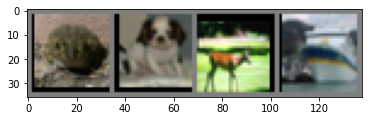

 frog   dog  deer  ship


In [4]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [5]:
# Define a Convolutional Neural Network
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv_layer = nn.Sequential(
            # Conv Layer block 1
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Conv Layer block 2
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout2d(p=0),

            # Conv Layer block 3
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        self.fc_layer = nn.Sequential(
            nn.Dropout(p=0),
            nn.Linear(4096, 1024),
            nn.ReLU(inplace=True),
            nn.Linear(1024, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(p=0),
            nn.Linear(512, 10)
        )

    def forward(self, x):

        # conv layers
        x = self.conv_layer(x)
        # flatten
        x = x.view(x.size(0), -1)
        # fc layer
        x = self.fc_layer(x)
        return x
        
net = CNN()
if torch.cuda.is_available():
  net = net.cuda()

In [6]:
# Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()
if torch.cuda.is_available():
  criterion = criterion.cuda()
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001, weight_decay = 1e-3)

In [7]:
# Train the network
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        if torch.cuda.is_available():
          inputs = inputs.cuda()
          labels = labels.cuda()

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.883
[1,  4000] loss: 1.574
[1,  6000] loss: 1.401
[1,  8000] loss: 1.293
[1, 10000] loss: 1.194
[1, 12000] loss: 1.110
[2,  2000] loss: 1.026
[2,  4000] loss: 0.960
[2,  6000] loss: 0.919
[2,  8000] loss: 0.902
[2, 10000] loss: 0.883
[2, 12000] loss: 0.827
[3,  2000] loss: 0.794
[3,  4000] loss: 0.767
[3,  6000] loss: 0.764
[3,  8000] loss: 0.734
[3, 10000] loss: 0.720
[3, 12000] loss: 0.718
[4,  2000] loss: 0.677
[4,  4000] loss: 0.680
[4,  6000] loss: 0.653
[4,  8000] loss: 0.661
[4, 10000] loss: 0.649
[4, 12000] loss: 0.637
[5,  2000] loss: 0.592
[5,  4000] loss: 0.609
[5,  6000] loss: 0.603
[5,  8000] loss: 0.586
[5, 10000] loss: 0.562
[5, 12000] loss: 0.590
[6,  2000] loss: 0.540
[6,  4000] loss: 0.571
[6,  6000] loss: 0.531
[6,  8000] loss: 0.554
[6, 10000] loss: 0.537
[6, 12000] loss: 0.545
[7,  2000] loss: 0.525
[7,  4000] loss: 0.495
[7,  6000] loss: 0.500
[7,  8000] loss: 0.523
[7, 10000] loss: 0.517
[7, 12000] loss: 0.506
[8,  2000] loss: 0.483
[8,  4000] 

In [8]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

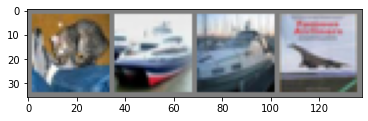

GroundTruth:    cat  ship  ship plane


In [9]:
# Test the network on the test data
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [10]:
#net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [11]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   ship   cat plane truck


In [12]:
correct = 0
total = 0
confusion_matrix = torch.zeros(len(classes), len(classes))
with torch.no_grad():
    for data in testloader:
        images, labels = data

        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


        for t, p in zip(labels.view(-1), predicted.view(-1)):
          confusion_matrix[t.long(), p.long()] += 1

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 83 %


In [13]:
classes = ('plane',
           'car',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck')

In [14]:
print(confusion_matrix)

tensor([[804.,   7.,  53.,   7.,   4.,   0.,   4.,   6., 105.,  10.],
        [  5., 896.,   0.,   1.,   0.,   2.,   3.,   3.,  29.,  61.],
        [ 51.,   1., 805.,  23.,  14.,  34.,  40.,  18.,  11.,   3.],
        [ 17.,   0.,  69., 653.,  23., 122.,  47.,  34.,  25.,  10.],
        [ 10.,   1.,  55.,  30., 773.,  26.,  28.,  66.,   8.,   3.],
        [  9.,   0.,  64.,  73.,   9., 789.,   5.,  39.,  10.,   2.],
        [  8.,   0.,  54.,  15.,  10.,  22., 871.,  10.,   7.,   3.],
        [ 11.,   0.,  30.,   9.,   9.,  25.,   2., 904.,   4.,   6.],
        [ 23.,   7.,   8.,   1.,   0.,   2.,   4.,   0., 949.,   6.],
        [ 15.,  19.,   2.,   4.,   0.,   1.,   3.,   6.,  32., 918.]])


In [15]:
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data

        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 50000 train images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 50000 train images: 85 %


In [16]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data

        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()
        outputs = net(images)
        
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 80 %
Accuracy of   car : 89 %
Accuracy of  bird : 80 %
Accuracy of   cat : 65 %
Accuracy of  deer : 77 %
Accuracy of   dog : 78 %
Accuracy of  frog : 87 %
Accuracy of horse : 90 %
Accuracy of  ship : 94 %
Accuracy of truck : 91 %
